In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

# Reading Data

In [7]:
df = pd.read_csv('train.csv')

# Exploring Data

In [8]:
df.head()# Will give you first 5 records

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#gain insights of your data set and see general information about each feature and the total number of non-null values in each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Well, as a first note, we can see that we are not so lucky, because we have missing values in some columns like __Gender, Married, Dependent, Self-Employed, LoanAmount, Loan_Amount_Term, and Credit_History__

# Data Cleaning

In [10]:
df_clean = df.copy()

In [11]:
df_clean.drop('Loan_ID',axis=1 ,inplace=True)

## Check Missing Values

In [12]:
df_clean.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df_clean.isnull().mean() * 100


Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Check Duplicated

In [14]:
df_clean.duplicated().sum()

0

# Data Visualisation  

- The term Univariate Analysis refers to the analysis of only one variable. The aim is to analyse and find out patterns specific to a single variable

In [15]:
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [16]:
for col in cat_cols:
    print(df_clean[col].value_counts())
    print('------------------------------------------------------------')

Male      489
Female    112
Name: Gender, dtype: int64
------------------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
------------------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
------------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
------------------------------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
------------------------------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
------------------------------------------------------------
Y    422
N    192
Name: Loan_Status, dtype: int64
------------------------------------------------------------


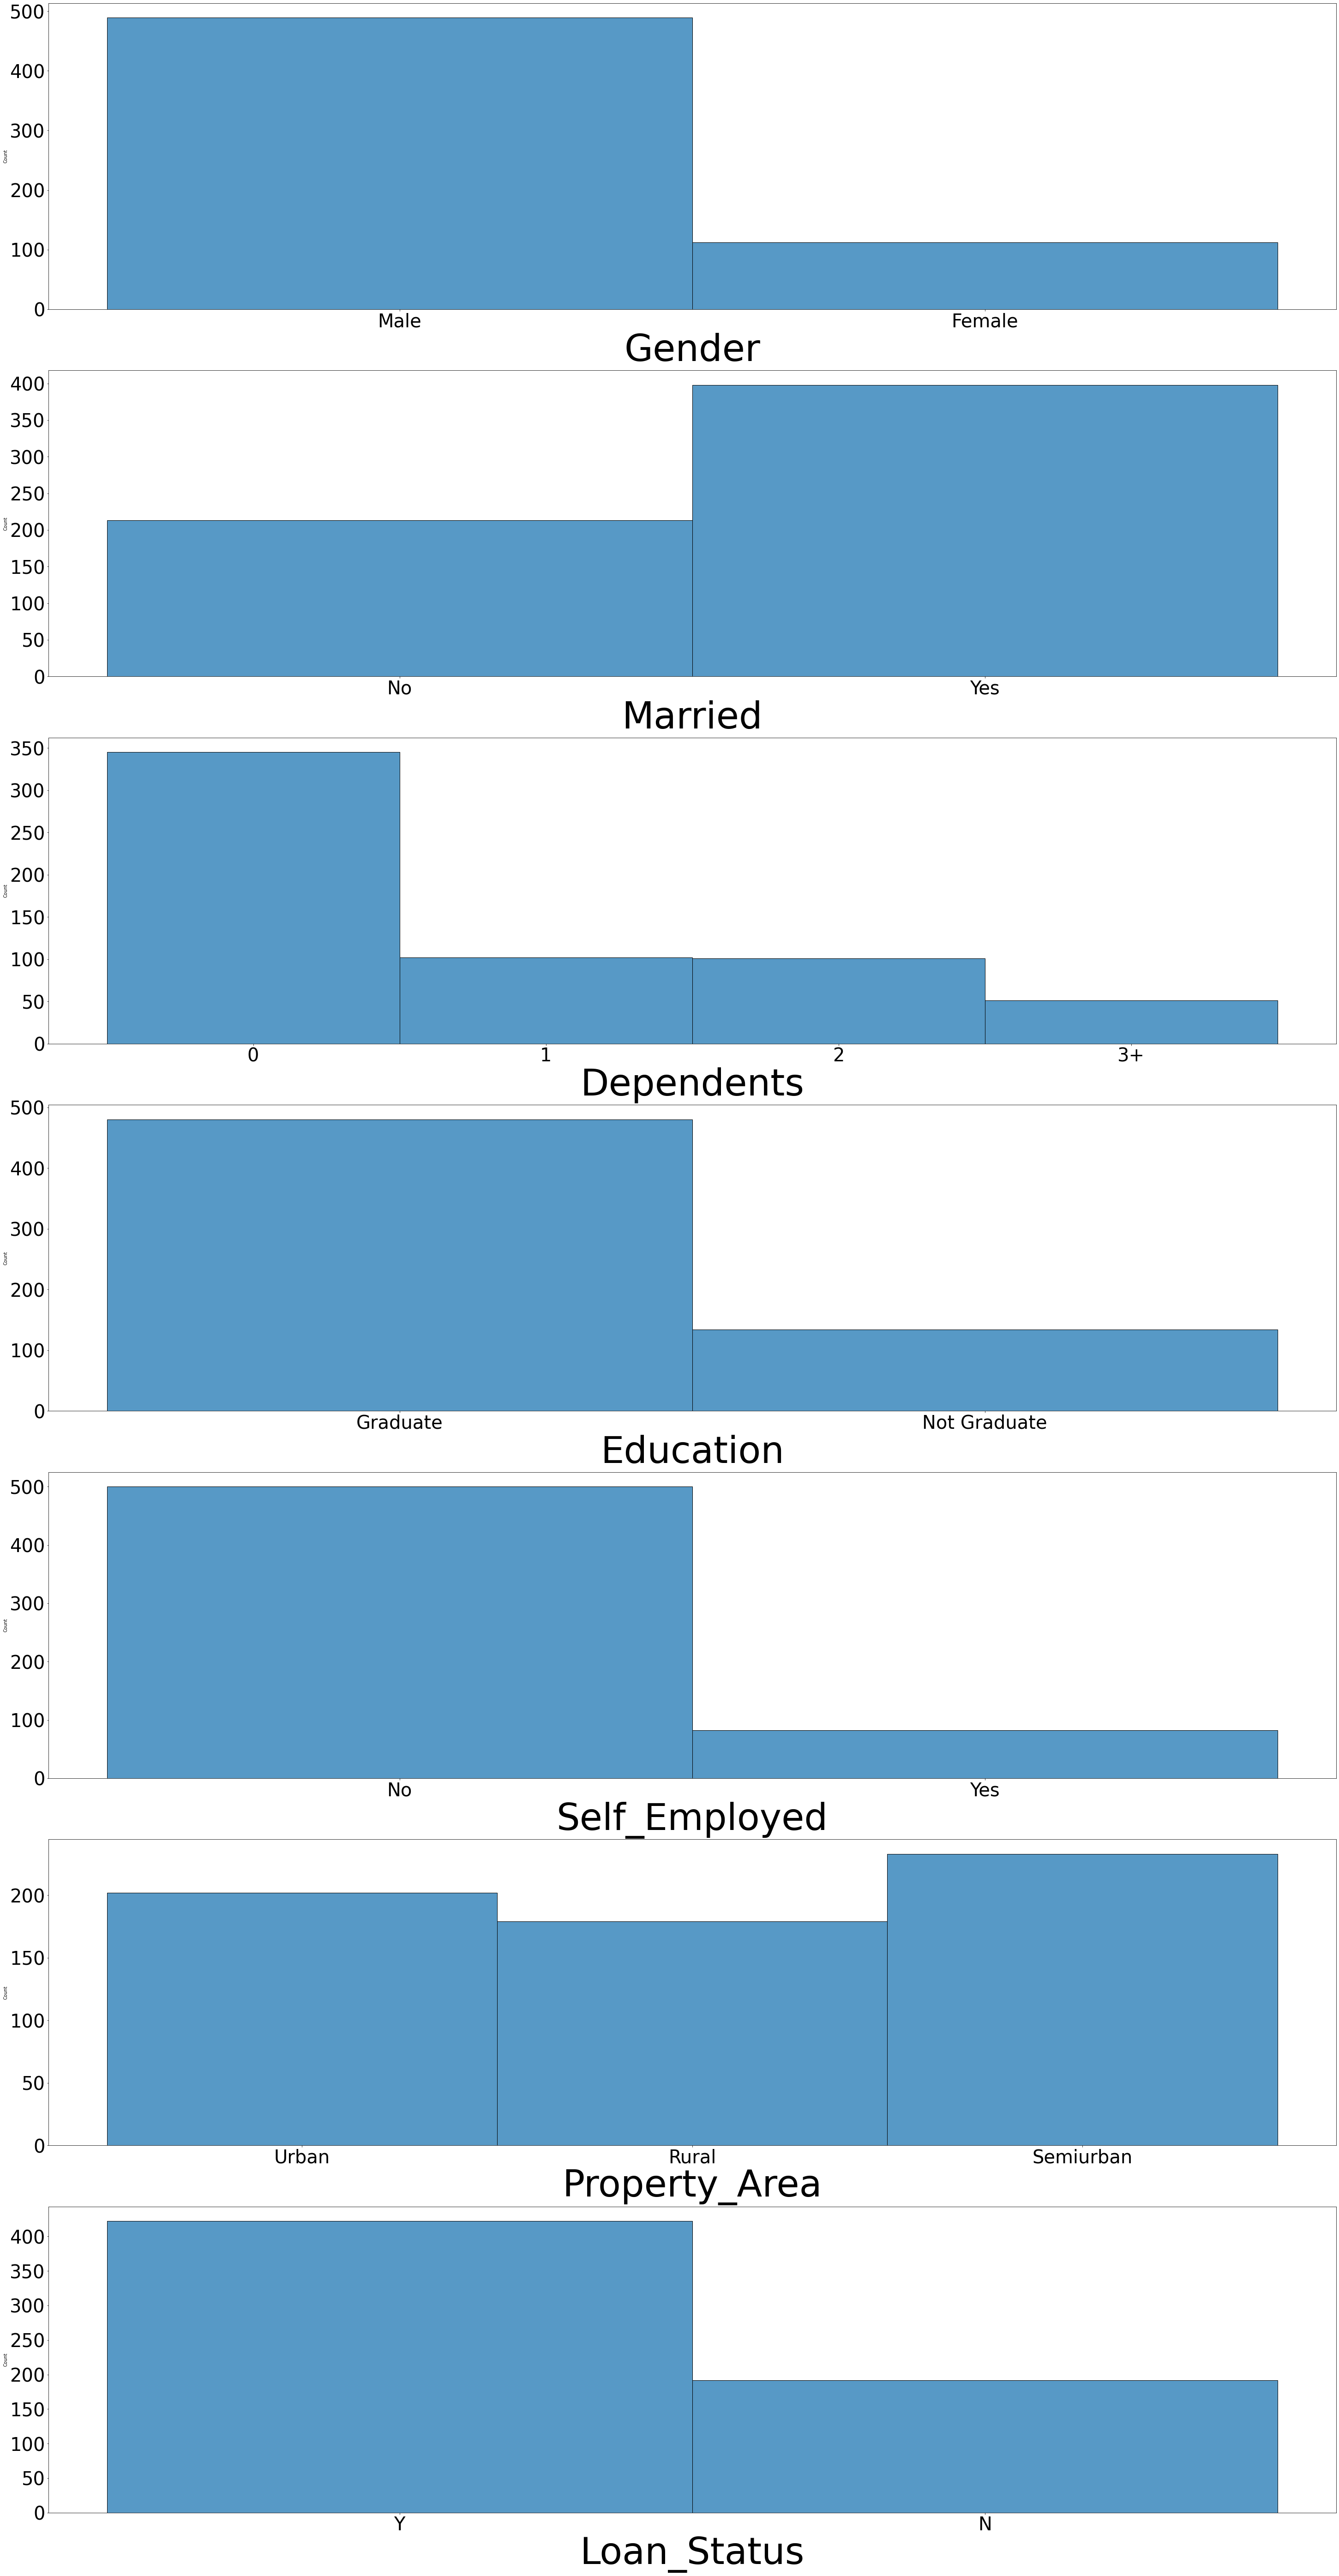

In [17]:
plt.figure(figsize = (50 , 100))
for i , col in enumerate (cat_cols  ,1) :
    plt.subplot((len(cat_cols)//1) , 1 , i )
    sns.histplot(data = df_clean , x = col)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.xlabel(col, fontsize=80)

In [18]:
num_cols = df_clean.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

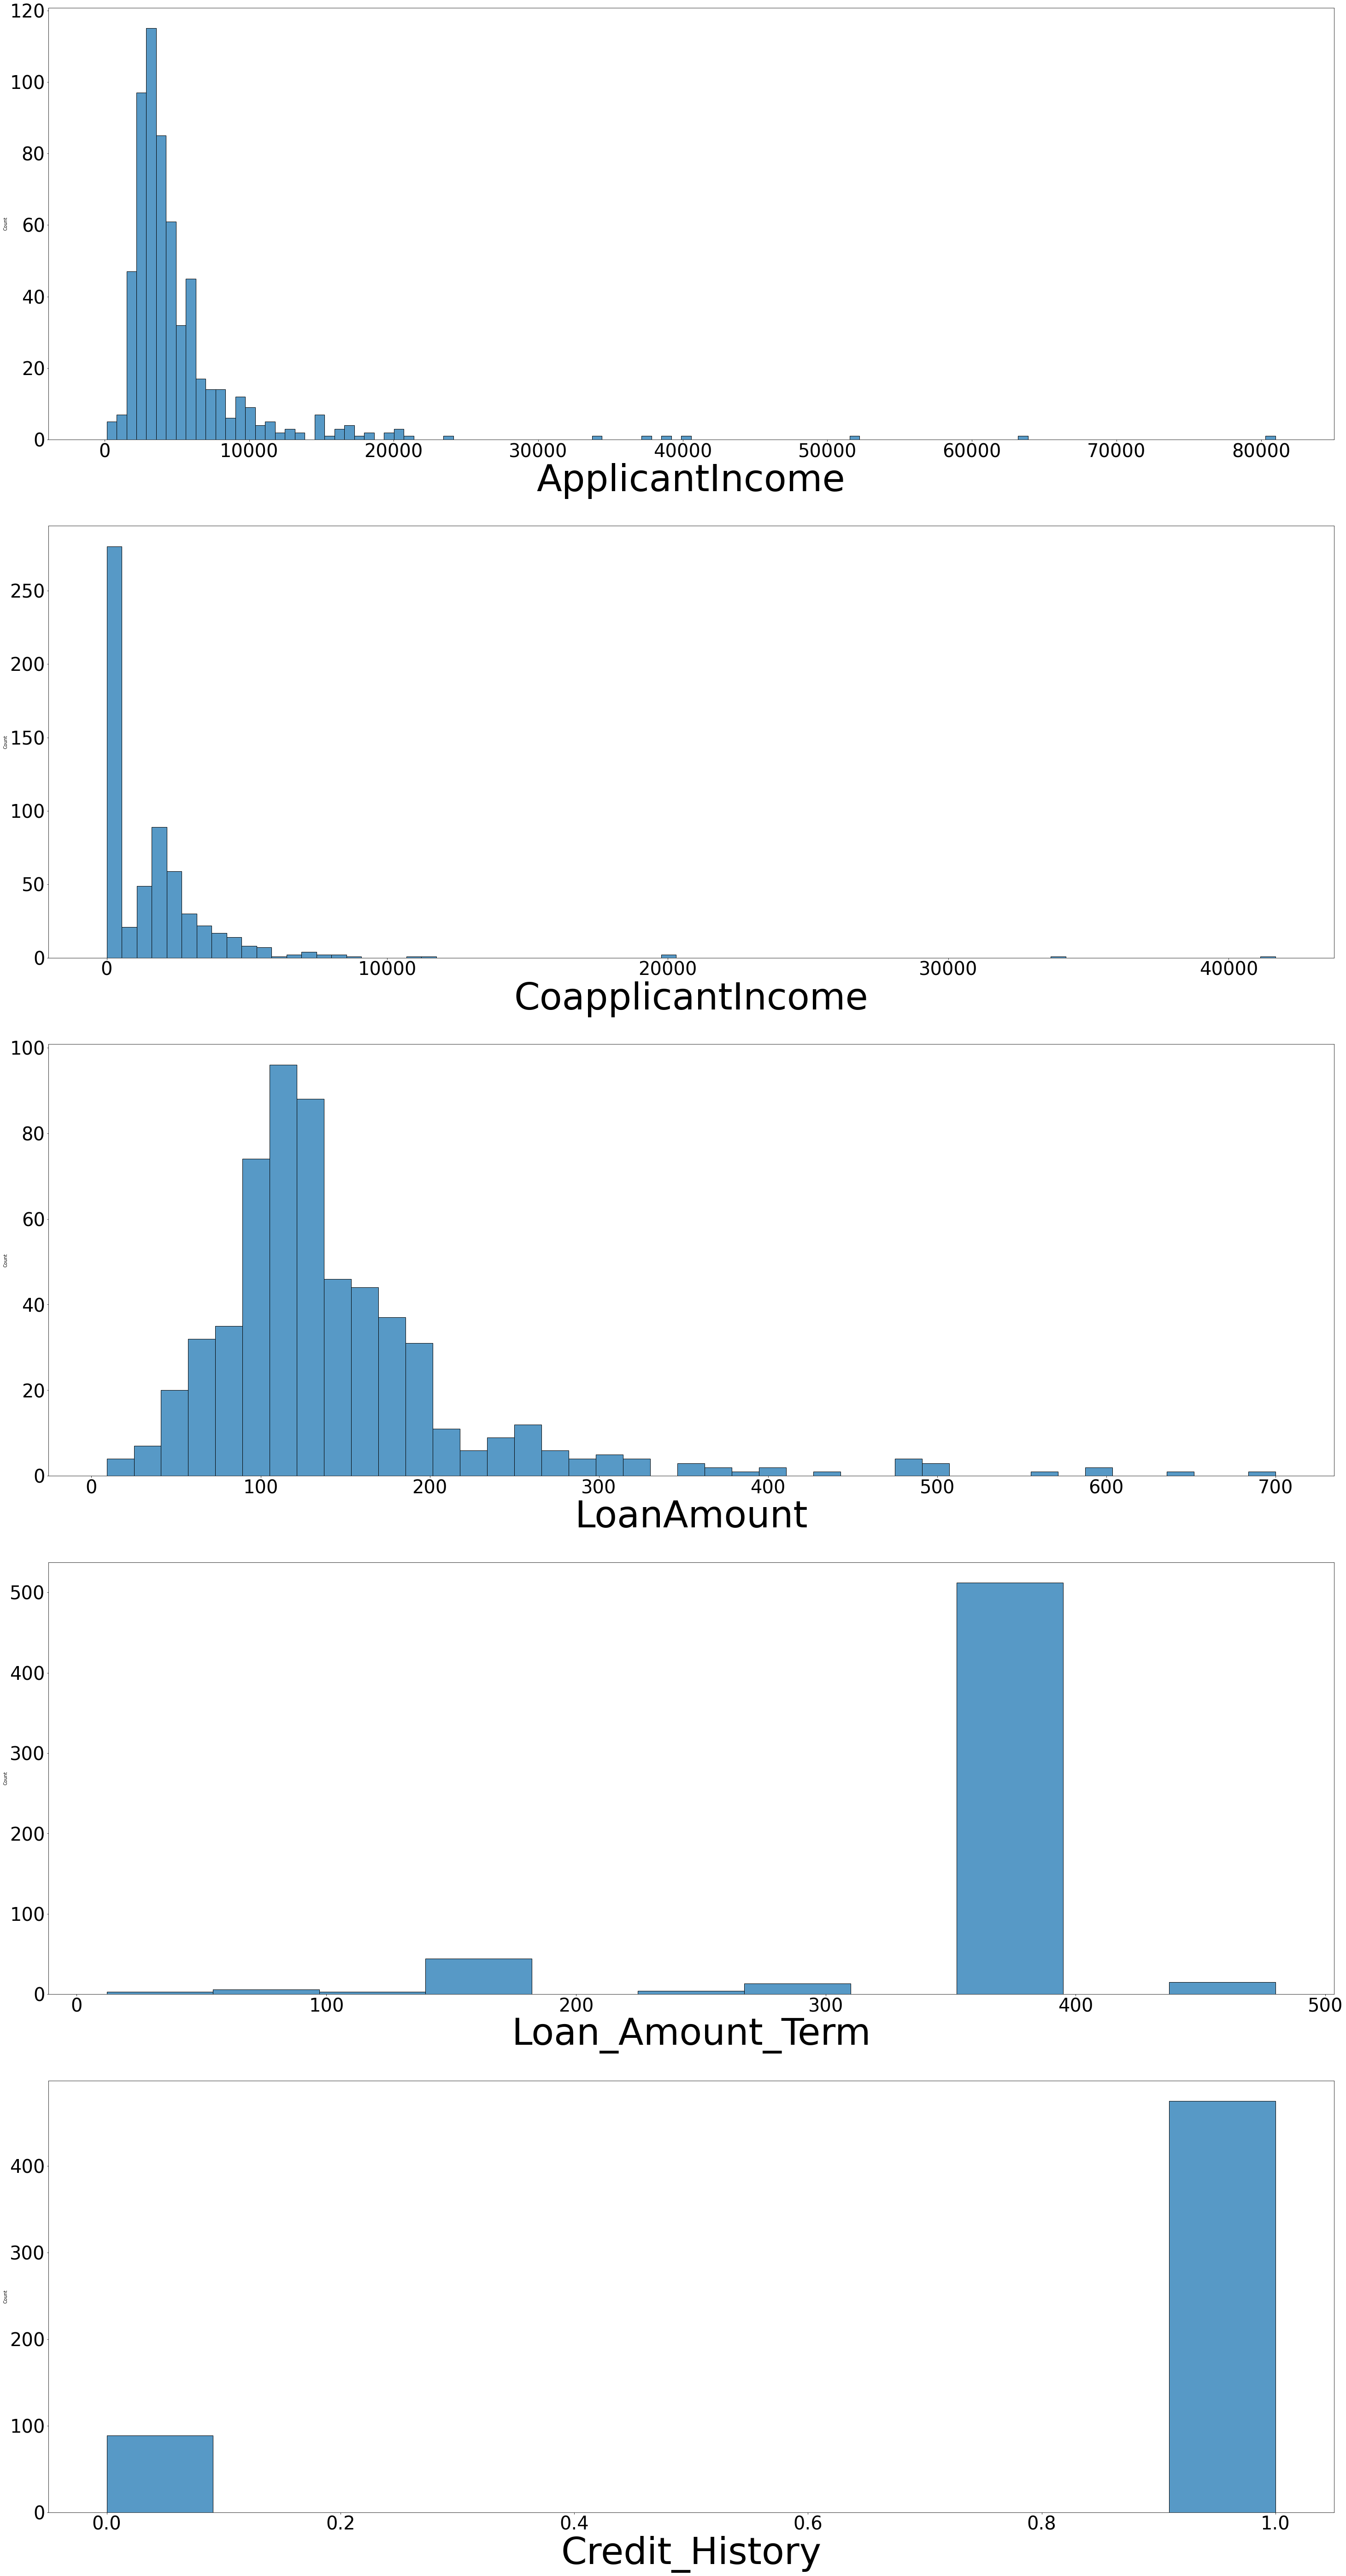

In [19]:
plt.figure(figsize = (50 , 100))
for i , col in enumerate (num_cols ,1) :
    plt.subplot((len(num_cols)//1) , 1 , i )
    sns.histplot(data = df_clean , x = col)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.xlabel(col, fontsize=80)

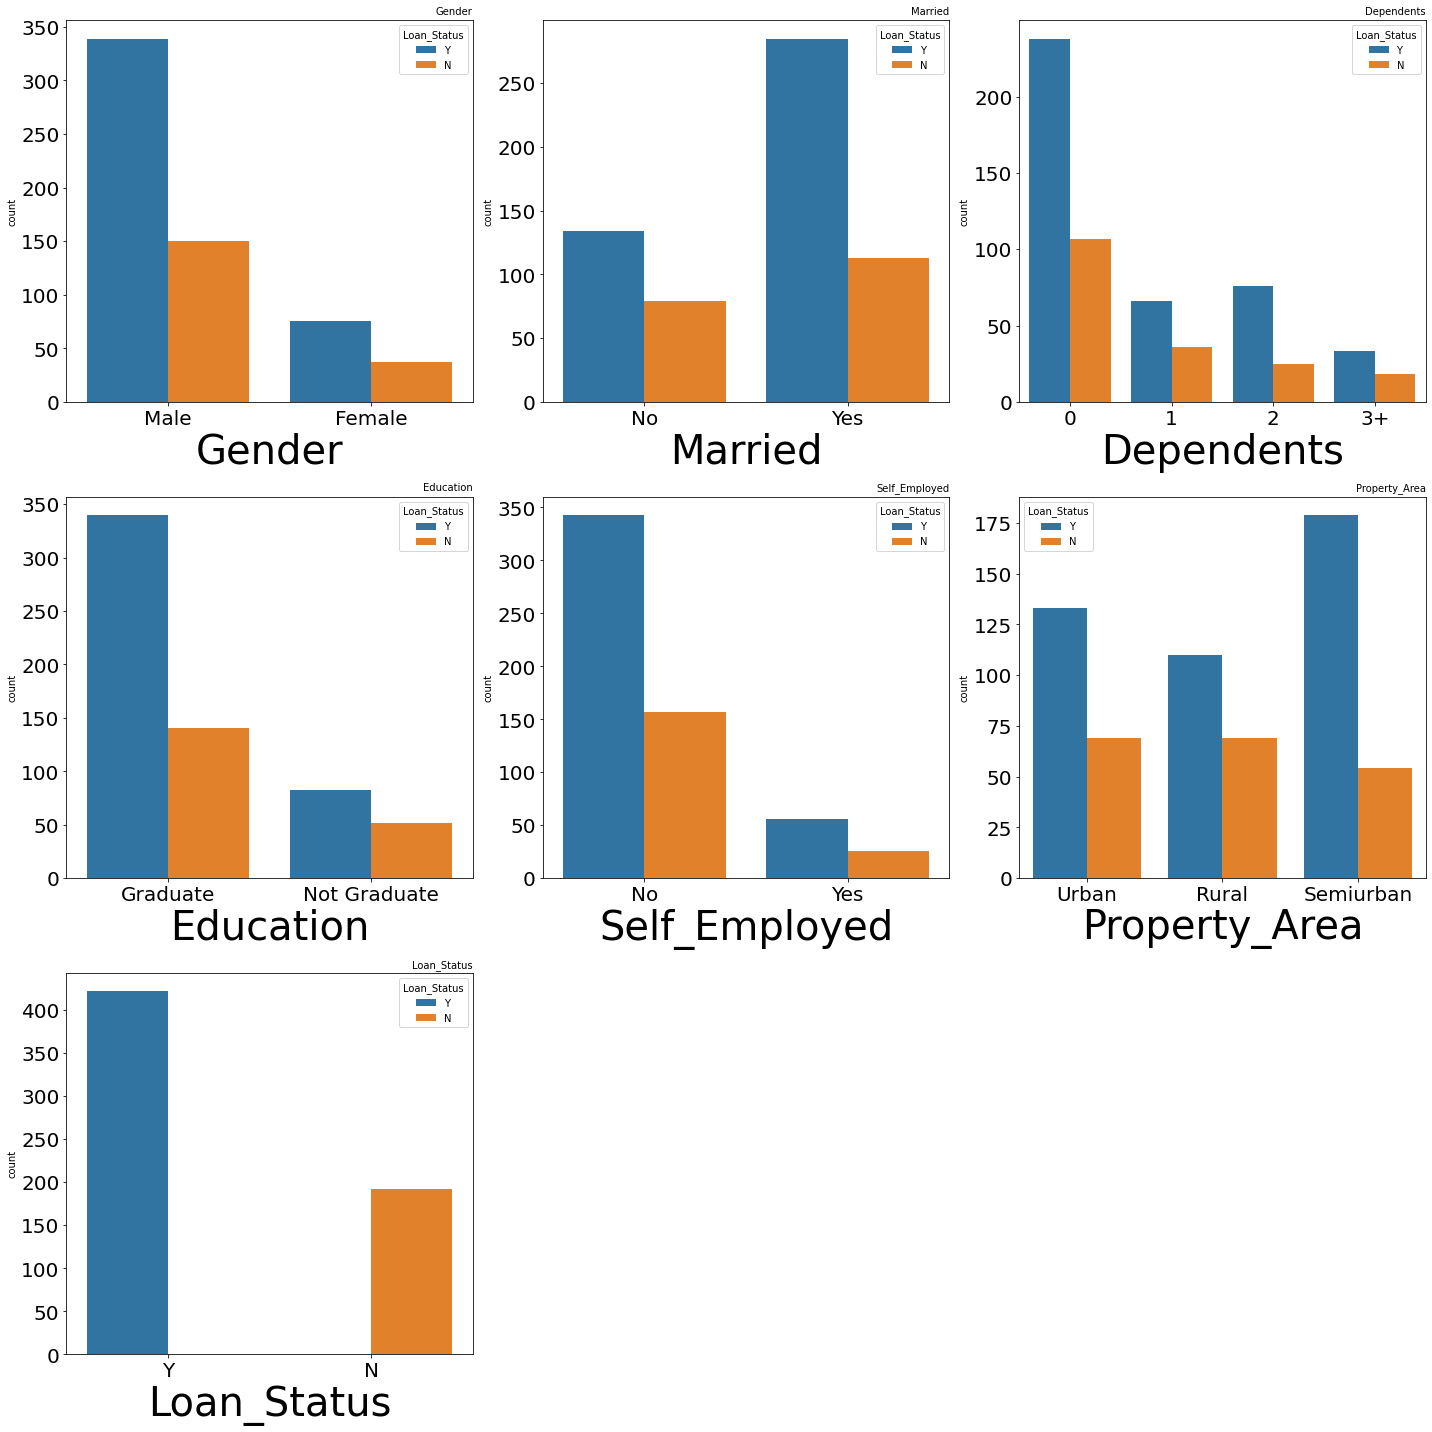

In [20]:
def plot_countplot(df_clean,cols):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(cols):
        plt.subplot(3,3,i+1)
        sns.countplot(x=col,data=df_clean,hue='Loan_Status')
        plt.title(f'{col}',size=10,loc='right')
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel(col, fontsize=40)
    plt.tight_layout()
    plt.show()

plot_countplot(df_clean,cat_cols)

# Data Splitting

In [21]:
# Data Splitting into features and target
X = df_clean.drop('Loan_Status', axis=1)
y = df_clean['Loan_Status']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
categorical_cols = list(df_clean.select_dtypes(include=['object']).columns)
categorical_cols.remove('Loan_Status')
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [23]:
numerical_cols = list(df_clean.select_dtypes(include=['int64', 'float64']).columns)
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [24]:
y_train.value_counts(normalize = True )


Y    0.696538
N    0.303462
Name: Loan_Status, dtype: float64

In [25]:
y_test.value_counts(normalize = True )


Y    0.650407
N    0.349593
Name: Loan_Status, dtype: float64

In [26]:
!pip install datasist


In [27]:
from datasist.structdata import detect_outliers 


In [28]:
idx = detect_outliers(X_train , 0 , ['ApplicantIncome','CoapplicantIncome','LoanAmount'])
out = X_train.loc[idx]
X_train = X_train.drop(idx  , axis=0)
y_train = y_train.drop(idx  , axis=0)

In [29]:
X_train.shape


(433, 11)

In [30]:
y_train.shape


(433,)

# Data Preprocessing

In [31]:
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']),
        ('cat', categorical_transformer, ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Models Bulding

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=0)
lr.fit(X_train_preprocessed , y_train)
y_pred = lr.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      0.42      0.59        43
           Y       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [33]:
lr2 = LogisticRegression(random_state=0 , class_weight = 'balanced')
lr2.fit(X_train_preprocessed , y_train)
y_pred = lr2.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.58      0.49      0.53        43
           Y       0.75      0.81      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.65      0.66       123
weighted avg       0.69      0.70      0.69       123



In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_preprocessed , y_train)
y_pred = dt.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.61      0.58      0.60        43
           Y       0.78      0.80      0.79        80

    accuracy                           0.72       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123



In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=9 ,random_state=42, max_depth=23)
rf.fit(X_train_preprocessed , y_train)
y_pred = rf.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.62      0.49      0.55        43
           Y       0.75      0.84      0.79        80

    accuracy                           0.72       123
   macro avg       0.69      0.66      0.67       123
weighted avg       0.71      0.72      0.71       123



In [37]:
pip install imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
   -------------------------------------- 235.6/235.6 kB 156.9 kB/s eta 0:00:00
   -------------------------------------- 302.2/302.2 kB 333.7 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [38]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train_preprocessed, y_train)
print(sorted(Counter(y_resampled).items()))

[('N', 128), ('Y', 128)]


In [39]:
lr.fit(X_resampled , y_resampled)
y_pred = dt.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.61      0.58      0.60        43
           Y       0.78      0.80      0.79        80

    accuracy                           0.72       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123



In [40]:
dt.fit(X_resampled , y_resampled)
y_pred = dt.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.44      0.63      0.51        43
           Y       0.74      0.56      0.64        80

    accuracy                           0.59       123
   macro avg       0.59      0.60      0.58       123
weighted avg       0.63      0.59      0.59       123



In [41]:
rf.fit(X_resampled , y_resampled)
y_pred = dt.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.44      0.63      0.51        43
           Y       0.74      0.56      0.64        80

    accuracy                           0.59       123
   macro avg       0.59      0.60      0.58       123
weighted avg       0.63      0.59      0.59       123



In [42]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators':range(8,12),
    'max_depth': range(15,25),
}
rf = RandomForestClassifier()
RCV = RandomizedSearchCV(estimator=rf, 
                   param_distributions=parameters, 
                   n_iter=3,
                   cv=3)

In [43]:
RCV.fit(X_train_preprocessed,y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'max_depth': range(15, 25),
                                        'n_estimators': range(8, 12)})

In [44]:
RCV.best_params_


{'n_estimators': 11, 'max_depth': 23}

In [45]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train_preprocessed, y_train)
print(sorted(Counter(y_resampled).items()))

[('N', 305), ('Y', 305)]


In [46]:
lr.fit(X_resampled , y_resampled)
y_pred = dt.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.44      0.63      0.51        43
           Y       0.74      0.56      0.64        80

    accuracy                           0.59       123
   macro avg       0.59      0.60      0.58       123
weighted avg       0.63      0.59      0.59       123



In [47]:
dt.fit(X_resampled , y_resampled)
y_pred = dt.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.61      0.51      0.56        43
           Y       0.76      0.82      0.79        80

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.71      0.72      0.71       123



In [48]:
rf.fit(X_resampled , y_resampled)
y_pred = dt.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.61      0.51      0.56        43
           Y       0.76      0.82      0.79        80

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.71      0.72      0.71       123



In [49]:
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_pipe, y_pipe = pipeline.fit_resample(X_train_preprocessed, y_train)
Counter(y_pipe)

Counter({'N': 152, 'Y': 152})

In [50]:
lr.fit(x_pipe , y_pipe)
y_pred = lr.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.56      0.53      0.55        43
           Y       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123

